<a href="https://colab.research.google.com/github/duongn169/duongn169/blob/main/Train_Tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#####Nguyễn Hoàng Dương - 19146085
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.keras.utils.data_utils import Sequence
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path =  '/content/drive/MyDrive/TienGiayVN'
valid_path =  '/content/drive/MyDrive/TienGiayVN'
test_path =   '/content/drive/MyDrive/TienGiayVN'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_batches = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=10, class_mode='categorical')

validation_batches = test_datagen.flow_from_directory(valid_path, target_size=(224, 224), batch_size=10, class_mode='categorical')

test_batches = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=10, class_mode='categorical')

Found 1946 images belonging to 10 classes.
Found 1946 images belonging to 10 classes.
Found 1946 images belonging to 10 classes.


In [5]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [6]:
classes = ['100k','10k','1k','200k','20k','2k','500VNĐ','500k','50k','5k']
print("Image Processing.......Compleated")

Image Processing.......Compleated


In [7]:

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Flatten(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0

In [8]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=validation_batches,
          validation_steps=len(validation_batches), epochs=100, verbose=1)

Epoch 1/100
195/195 [==============================] - 949s 5s/step - loss: 1.7189 - accuracy: 0.3032 - val_loss: 1.4692 - val_accuracy: 0.4640
Epoch 2/100
195/195 [==============================] - 72s 372ms/step - loss: 1.3405 - accuracy: 0.4717 - val_loss: 1.0226 - val_accuracy: 0.5591
Epoch 3/100
195/195 [==============================] - 73s 376ms/step - loss: 1.1792 - accuracy: 0.5447 - val_loss: 0.8041 - val_accuracy: 0.7795
Epoch 4/100
195/195 [==============================] - 72s 368ms/step - loss: 0.9386 - accuracy: 0.6418 - val_loss: 0.6922 - val_accuracy: 0.7806
Epoch 5/100
195/195 [==============================] - 72s 369ms/step - loss: 0.8154 - accuracy: 0.7127 - val_loss: 0.8305 - val_accuracy: 0.6274
Epoch 6/100
195/195 [==============================] - 71s 364ms/step - loss: 0.7237 - accuracy: 0.7436 - val_loss: 0.4033 - val_accuracy: 0.8674
Epoch 7/100
195/195 [==============================] - 71s 363ms/step - loss: 0.5814 - accuracy: 0.7903 - val_loss: 0.4588 - v

In [9]:
model.save('Train_Tien.h5')

Saving 0072.png to 0072.png
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  10k


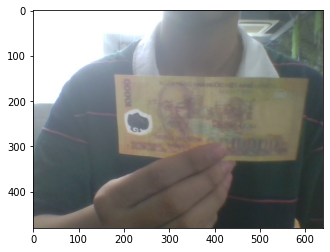

In [11]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=200000)
  print(y_predict)
  print('Giá trị dự đoán: ', classes[np.argmax(y_predict)])